In [153]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# background:0,0,0::
# burn:190,97,29::
# skin:99,169,77::

In [154]:
file_list = glob.glob("./Dataset/labeledburnsegments/SegmentationClass/*.png")
print(len(file_list))

200


In [155]:
practice_file = './Dataset/labeledburnsegments/SegmentationClass/img100.png'
practice_file2 = practice_file.replace("SegmentationClass", "SegmentationObject")
practice_image = cv2.imread(practice_file)
practice_image = cv2.cvtColor(practice_image, cv2.COLOR_BGR2RGB)
practice_image2 = cv2.imread(practice_file2)
practice_image2 = cv2.cvtColor(practice_image2, cv2.COLOR_BGR2RGB)
print(practice_file)

./Dataset/labeledburnsegments/SegmentationClass/img100.png


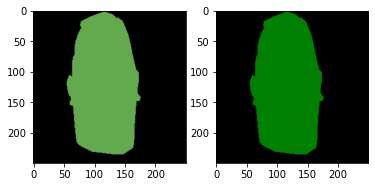

In [156]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(practice_image)
axarr[1].imshow(practice_image2)
plt.show()

In [157]:
print(type(practice_image))
unique_colors = np.unique(practice_image.reshape(-1, practice_image.shape[2]), axis=0)
print(len(unique_colors))
print(unique_colors)

<class 'numpy.ndarray'>
2
[[  0   0   0]
 [ 99 169  77]]


In [158]:
def load_rgb_image(filename):
    return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

In [159]:
images_without_burns = []
print("These Images have no burns:")
file_list.sort()
for filename in file_list:
    break
    tmp_img = load_rgb_image(filename)
    if len(np.unique(tmp_img.reshape(-1, tmp_img.shape[2]), axis=0)) != 3:
        images_without_burns.append(os.path.basename(filename))
        print(os.path.basename(filename))

These Images have no burns:


In [160]:
print(len(images_without_burns))
test_segment = [76.2, 60.7, 87.7, 54.4, 94.0, 46.8, 102.9, 41.5, 116.41, 40.55, 121.03, 48.47, 120.37, 55.07, 125.32, 60.34, 127.63, 68.26, 123.67, 75.18, 118.39, 77.49, 116.08, 84.09, 111.46, 90.03, 102.89, 96.62, 99.92, 97.28, 94.31, 89.37, 83.1, 86.4, 81.45, 80.46, 74.85, 71.56]
test_segment_verted  = []
for index, num in enumerate(test_segment):
    if index % 2 == 0:
        test_segment_verted.append((test_segment[index], test_segment[index + 1]))
tmp_img = practice_image.copy()
test_segment_verted = np.array(test_segment_verted, dtype=np.int32)
print(test_segment_verted)

0
[[ 76  60]
 [ 87  54]
 [ 94  46]
 [102  41]
 [116  40]
 [121  48]
 [120  55]
 [125  60]
 [127  68]
 [123  75]
 [118  77]
 [116  84]
 [111  90]
 [102  96]
 [ 99  97]
 [ 94  89]
 [ 83  86]
 [ 81  80]
 [ 74  71]]


int32
(19, 2)


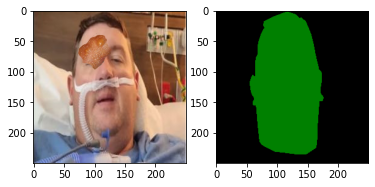

In [161]:
real_img = load_rgb_image('./Dataset/labeledburnsegments/JPEGImages/img100.jpg')
print(test_segment_verted.dtype)
print(test_segment_verted.shape)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(real_img)
axarr[1].imshow(practice_image2)
plt.show()

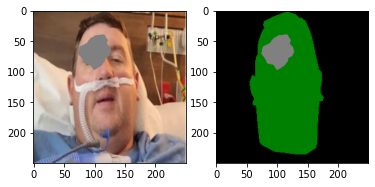

In [162]:
cv2.fillPoly(real_img, pts = [test_segment_verted], color =(128,128,128))
cv2.fillPoly(practice_image2, pts = [test_segment_verted], color =(128,128,128))

f, axarr = plt.subplots(1,2)
axarr[0].imshow(real_img)
axarr[1].imshow(practice_image2)
plt.show()


